In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('non_linear.csv')

In [5]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [22]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=0.01)
model_linear = Ridge(alpha = 0)

degree = 10

X = generate_degrees(data.x_train, degree)
y = data.y_train.values

In [16]:
model_ridge.fit(X, y)
model_linear.fit(X, y)

C:\Users\FilippKashket\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.48967e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\FilippKashket\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23572e-22): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [17]:
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)

y_linspace_linear = model_linear.predict(generate_degrees(x_linspace, degree))
y_linspace_ridge = model_ridge.predict(generate_degrees(x_linspace, degree))


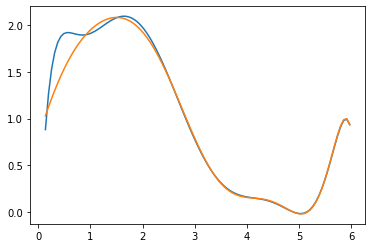

In [20]:
import matplotlib.pyplot as plt
plt.plot(x_linspace , y_linspace_linear)
plt.plot(x_linspace , y_linspace_ridge)
plt.show()

In [21]:
from numpy.linalg import norm
print("Норма вектора весов Ridge %.3f" % norm(model_ridge.coef_))
print("Норма вектора весов Linear %.3f" % norm(model_linear.coef_))

Норма вектора весов Ridge 1.943
Норма вектора весов Linear 72.985


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape)

(40, 10) (10, 10)


In [28]:
from sklearn.metrics import mean_squared_error
alphas = [0.1, 0.15, 0.35, 0.5, 0.8]

best_alpha = alphas[0]
best_rmse = np.infty

for alpha in alphas:
    model_ridge=Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)
    y_pred = model_ridge.predict(X_valid)
    error = mean_squared_error(y_valid, y_pred)
    if error < best_rmse:
        best_rmse = error
        best_alpha = alpha
    print("alpha=%.3f, rmse=%.4f," %(alpha, error)) 

print("Best alpha=%.2f, Best rmse=%.4f" %(best_alpha, best_rmse))

alpha=0.100, rmse=0.0426,
alpha=0.150, rmse=0.0423,
alpha=0.350, rmse=0.0425,
alpha=0.500, rmse=0.0430,
alpha=0.800, rmse=0.0437,
Best alpha=0.15, Best rmse=0.0423


C:\Users\FilippKashket\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.01094e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\FilippKashket\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1636e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\FilippKashket\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.74011e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\FilippKashket\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.85494e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\FilippKashket\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.05148e-17): result may not be accurate.
  overwrite_a=True).T
